In [17]:
# Toggle if you want to rerun all code or if you want to read from file
read_from_file = True

In [19]:
%run 'function_definitions.ipynb'
import pickle


if read_from_file:
    (fg_0_sub, fg_0_sub_err, fg_0_he_sub, fg_0_he_sub_err, e_scale,
    e_scale_he, m_doub_sub,
    m_high_2,
    m_and,
    min_e,
    max_e,
    get_neutron_spectrum_interpolated,
    get_neutron_spectrum_interpolated_2,
    get_neutron_spectrum_interpolated_3,
    neutron_energies,
    electron_energies,
    e_and,
    y_and) = pickle.load( open( "processed_data.pkl", "rb" ) )
else:
    # Load the NG data and the response function and dump output into variables
    from IPython.utils import io
    with io.capture_output() as output_07:
        %run '07_deconvolution.ipynb'
    with io.capture_output() as output_10:
        %run '10_read_andreas_result.ipynb'
        
    pickle.dump( 
        (
            fg_0_sub,
            fg_0_sub_err,
            fg_0_he_sub,
            fg_0_he_sub_err,
            e_scale,
            e_scale_he,
            m_doub_sub,
            m_high_2,
            m_and,
            min_e, max_e,
            get_neutron_spectrum_interpolated, get_neutron_spectrum_interpolated_2, get_neutron_spectrum_interpolated_3,
            neutron_energies, electron_energies,
            e_and,y_and,
            vals1, vals2,
        ),
        open( "processed_data.pkl", "wb" ) )



In [12]:
    with io.capture_output() as output_10:
        %run '10_read_andreas_result.ipynb'

In [1]:
# Load the NG data and the response function and dump output into variables
from IPython.utils import io
with io.capture_output() as output_07:
    %run '07_deconvolution.ipynb'

TypeError: 'NoneType' object is not subscriptable

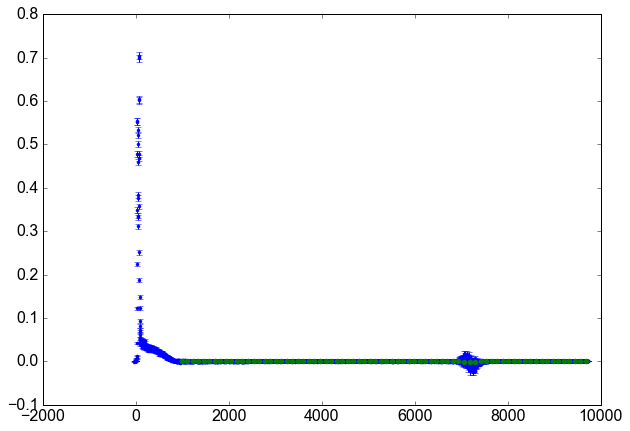

In [21]:
rebin_fac = 1

vals1 = m_doub_sub.values
vals2 = m_high_2.values

# Data (rebinned)
plt.errorbar(rebin(e_scale,rebin_fac), rebin(fg_0_sub,rebin_fac), rebin(fg_0_sub_err,rebin_fac, mode='quad_avg'),
             ls='None', marker='.', label='Background subtracted')
# High energy data
plt.errorbar(e_scale_he, 0.02*fg_0_he_sub, 0.02*fg_0_he_sub_err, ls='None', marker='.', markersize = 10, label='High energy BG rejection')

# Subplots (3 contributions)
plt.plot(e_scale, get_neutron_spectrum_interpolated(e_scale, vals1['a1'], vals1['mu1'], vals1['sigma1']), 
         color='red', lw=1.5,
        label='$\mu$ = %.2f MeV, $\sigma$ = %.2f MeV' % (vals1['mu1'], vals1['sigma1']), ls='--')
plt.plot(e_scale, get_neutron_spectrum_interpolated(e_scale, vals1['a2'], vals1['mu2'], vals1['sigma2']), 
         color='red', lw=1.5,
        label='$\mu$ = %.2f MeV, $\sigma$ = %.2f MeV' % (vals1['mu2'], vals1['sigma2']), ls='--')
plt.plot(e_scale, get_neutron_spectrum_interpolated(e_scale, 0.02*vals2['a'], vals2['mu'], vals2['sigma']), 
         color='red', lw=1.5,
        label='$\mu$ = %.2f MeV, $\sigma$ = %.2f MeV' % (vals2['mu'], vals2['sigma']), ls='--')

# Full fit
plt.plot(e_scale, get_neutron_spectrum_interpolated_3(e_scale,
                                                     vals1['a1'], vals1['mu1'], vals1['sigma1'],
                                                     vals1['a2'], vals1['mu2'], vals1['sigma2'],
                                                     0.02*vals2['a'], vals2['mu'], vals2['sigma'], 
                                                     ), color='red', lw=2,
        label='Sum')

draw_box((min_e, max_e), (0, 1), facecolor='green', alpha=0.2)
plt.text(500, 0.04, 'Fit range', color='green')

plt.ylim(1e-6,1e-1)
#plt.xlim(0,9000)
plt.xscale('log')
plt.xlim(100.,1e4)
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy (keV$_{ee}$)')
plt.ylabel('Differential rate (Hz/(2.38 keVee))')
plt.title('Double Gaussian fit for background subtracted spectrum')
plt.show()
print('Fit range from %d keV to %d keV' % (min_e, max_e))

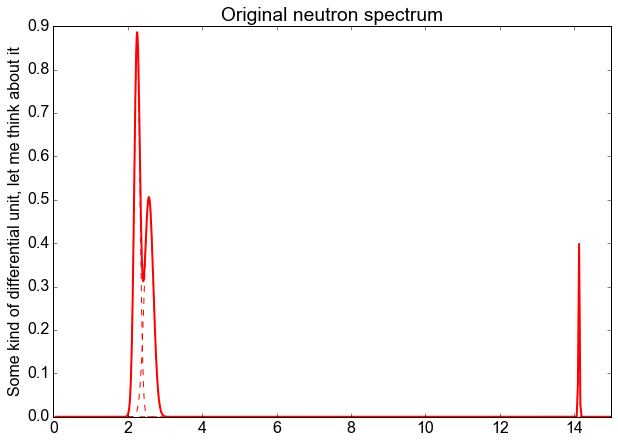

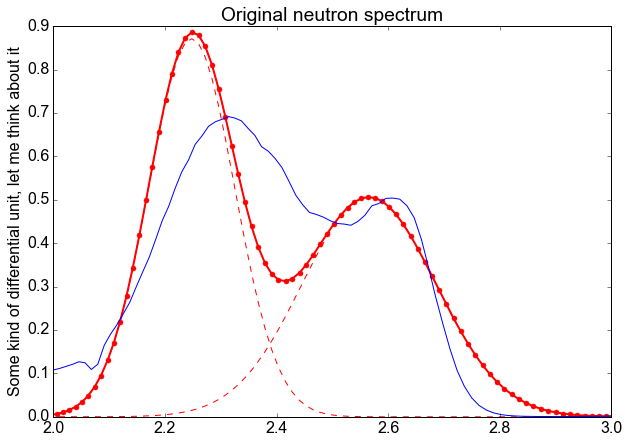

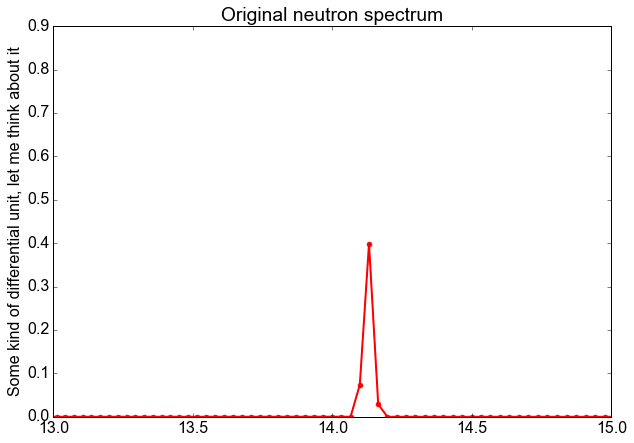

In [14]:
plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']),c='red',ls='--')
plt.plot(neutron_energies, 0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']) +
         vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']) +
         0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma'])
         ,c='red',lw=2)
plt.xlim(0, 15)
plt.ylabel('Some kind of differential unit, let me think about it')
plt.title('Original neutron spectrum')
plt.show()

plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']),c='red',ls='--')
plt.plot(neutron_energies, 0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']) +
         vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']) +
         0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma'])
         ,c='red',lw=2, marker='.', markersize=10)

plt.plot(e_and, 0.5*y_and)

plt.xlim(2, 3)
plt.ylabel('Some kind of differential unit, let me think about it')
plt.title('Original neutron spectrum')
plt.show()

plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']),c='red',ls='--')
plt.plot(neutron_energies, 0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma']),c='red',ls='--')
plt.plot(neutron_energies, vals1['a1']*gaussian(neutron_energies, vals1['mu1'],vals1['sigma1']) +
         vals1['a2']*gaussian(neutron_energies, vals1['mu2'],vals1['sigma2']) +
         0.02*vals2['a']*gaussian(neutron_energies, vals2['mu'],vals2['sigma'])
         ,c='red',lw=2, marker='.', markersize=10)
plt.xlim(13, 15)
plt.ylabel('Some kind of differential unit, let me think about it')
plt.title('Original neutron spectrum')
plt.show()